In [2]:
from time import time
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scanpy as sc
from bbknn import bbknn
import scanorama as scnrma
import pandas as pd

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.set_figure_params(dpi=100)

scanpy==1.6.0 anndata==0.7.4 umap==0.3.10 numpy==1.17.2 scipy==1.5.2 pandas==1.1.0 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1 leidenalg==0.7.0


# P28 gluta


In [231]:
#P28_glut = adata_gluta[adata_gluta.obs.batch=='P28', :] no need after first time
del P28_glut.obsp
del P28_glut.varm
del P28_glut.obsm
del P28_glut.uns
P28_glut.X = P28_glut.raw.X
sc.pp.highly_variable_genes(P28_glut, min_mean=0.0125, max_mean=3, min_disp=0.5) #HVGs

'''
sc.pp.scale(P28_glut, max_value=10) #scale
sc.tl.pca(P28_glut, svd_solver='arpack') #run PCA

P28_glut_CBs = list(P28_glut.obs.index)
P28_glut_batch = []
for i in range(len(P28_glut_CBs)):
    P28_glut_batch.append(P28_glut_CBs[i][19:25])
    
P28_glut.obs['sample'] = P28_glut.obs['batch']
P28_glut.obs['sample'] = P28_glut_batch

#sc.pp.neighbors(P28_glut, n_neighbors=25, n_pcs=40) #choose 25 standard for now
bbknn(P28_glut, batch_key='sample',neighbors_within_batch=6 ) #8*3~=25
sc.tl.leiden(P28_glut)
sc.tl.umap(P28_glut)
'''

var_genes = list(P28_glut[:,P28_glut.var['highly_variable']].var_names)

batches = ['P28_1a','P28_1b', 'P28_2a', 'P28_2b']
alldata = {}
for batch in batches:
    alldata[batch] = P28_glut[P28_glut.obs['sample'] == batch,]

alldata2 = dict()
for ds in alldata.keys():
    print(ds)
    alldata2[ds] = alldata[ds][:,var_genes]

#convert to list of AnnData objects
P28_gluts = list(alldata2.values())

# run scanorama.integrate
scanorama  = scanorama.integrate_scanpy(P28_gluts, dimred = 50,)

# returns a list of 2 np.ndarrays with 50 columns.

print(scanorama[0].shape)
print(scanorama[1].shape)

# make inteo one matrix.
all_s = np.concatenate(scanorama)
print(all_s.shape)

# add to the AnnData object
P28_glut.obsm["SC"] = all_s

P28_1a
P28_1b
P28_2a
P28_2b
Found 2971 genes among all datasets
[[0.         0.9648939  0.70332889 0.55784314]
 [0.         0.         0.8689747  0.64485294]
 [0.         0.         0.         0.96910786]
 [0.         0.         0.         0.        ]]
Processing datasets (2, 3)
Processing datasets (0, 1)
Processing datasets (1, 2)
Processing datasets (0, 2)
Processing datasets (1, 3)
Processing datasets (0, 3)
(3817, 50)
(3726, 50)
(15378, 50)


/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../opt/anaconda3/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  self.func_ir.loc))
/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../opt/anaconda3/

In [340]:
sc.pp.neighbors(P28_glut, n_neighbors=15, n_pcs=40, use_rep='SC')
sc.tl.leiden(P28_glut)
sc.tl.umap(P28_glut)

/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../opt/anaconda3/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


P28_glut = P28_glut[P28_glut.obs['leiden']!='17',:]

/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


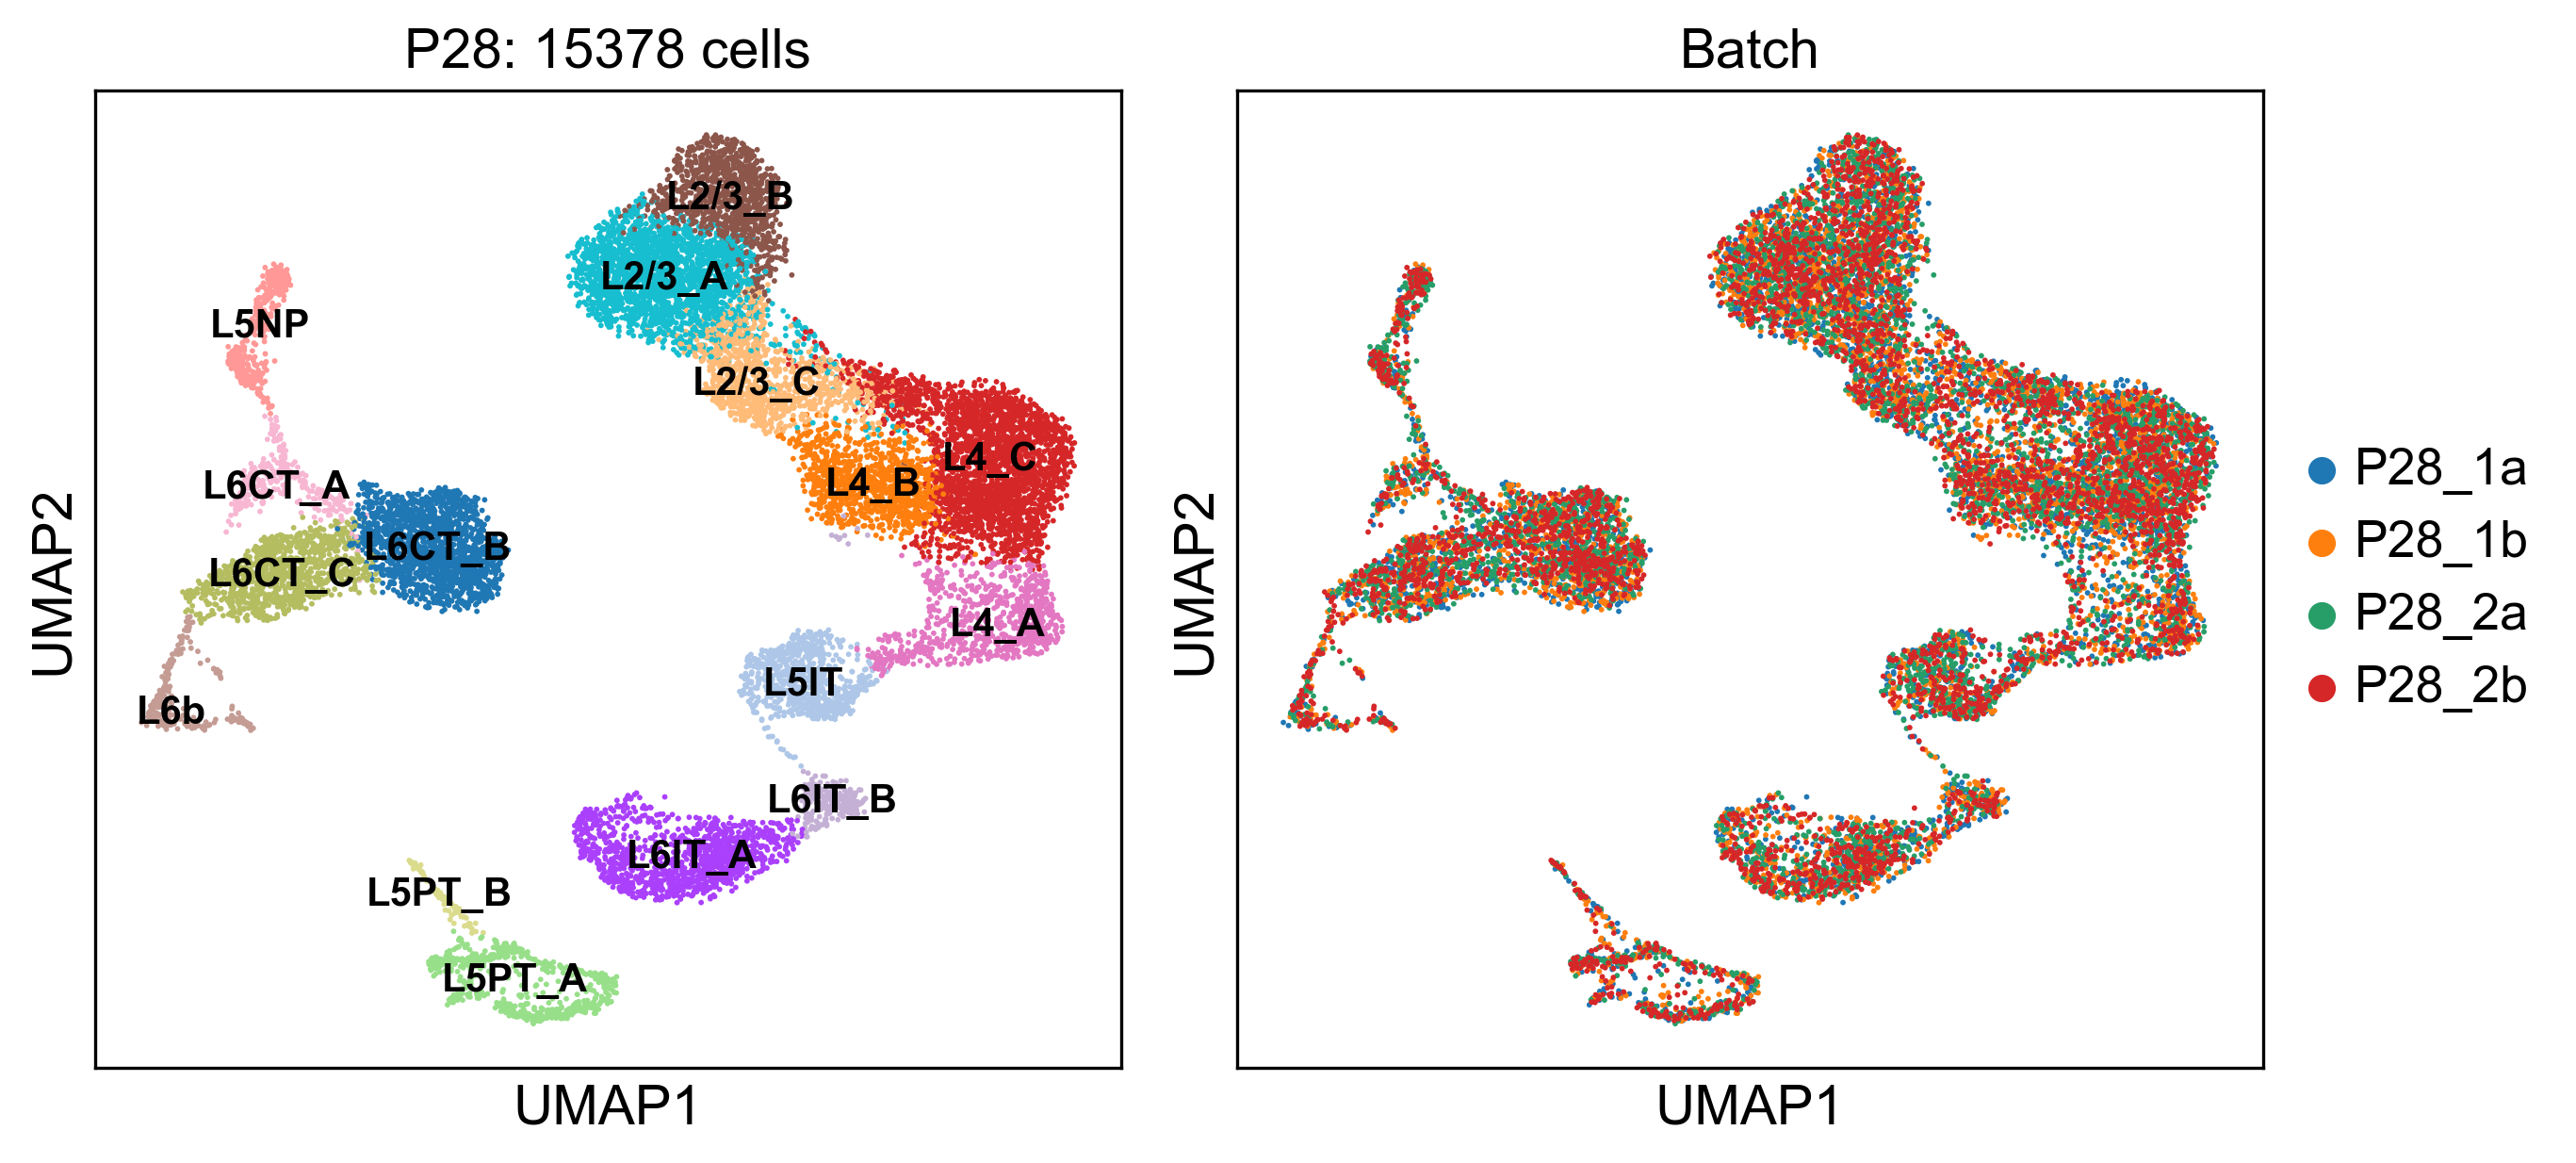

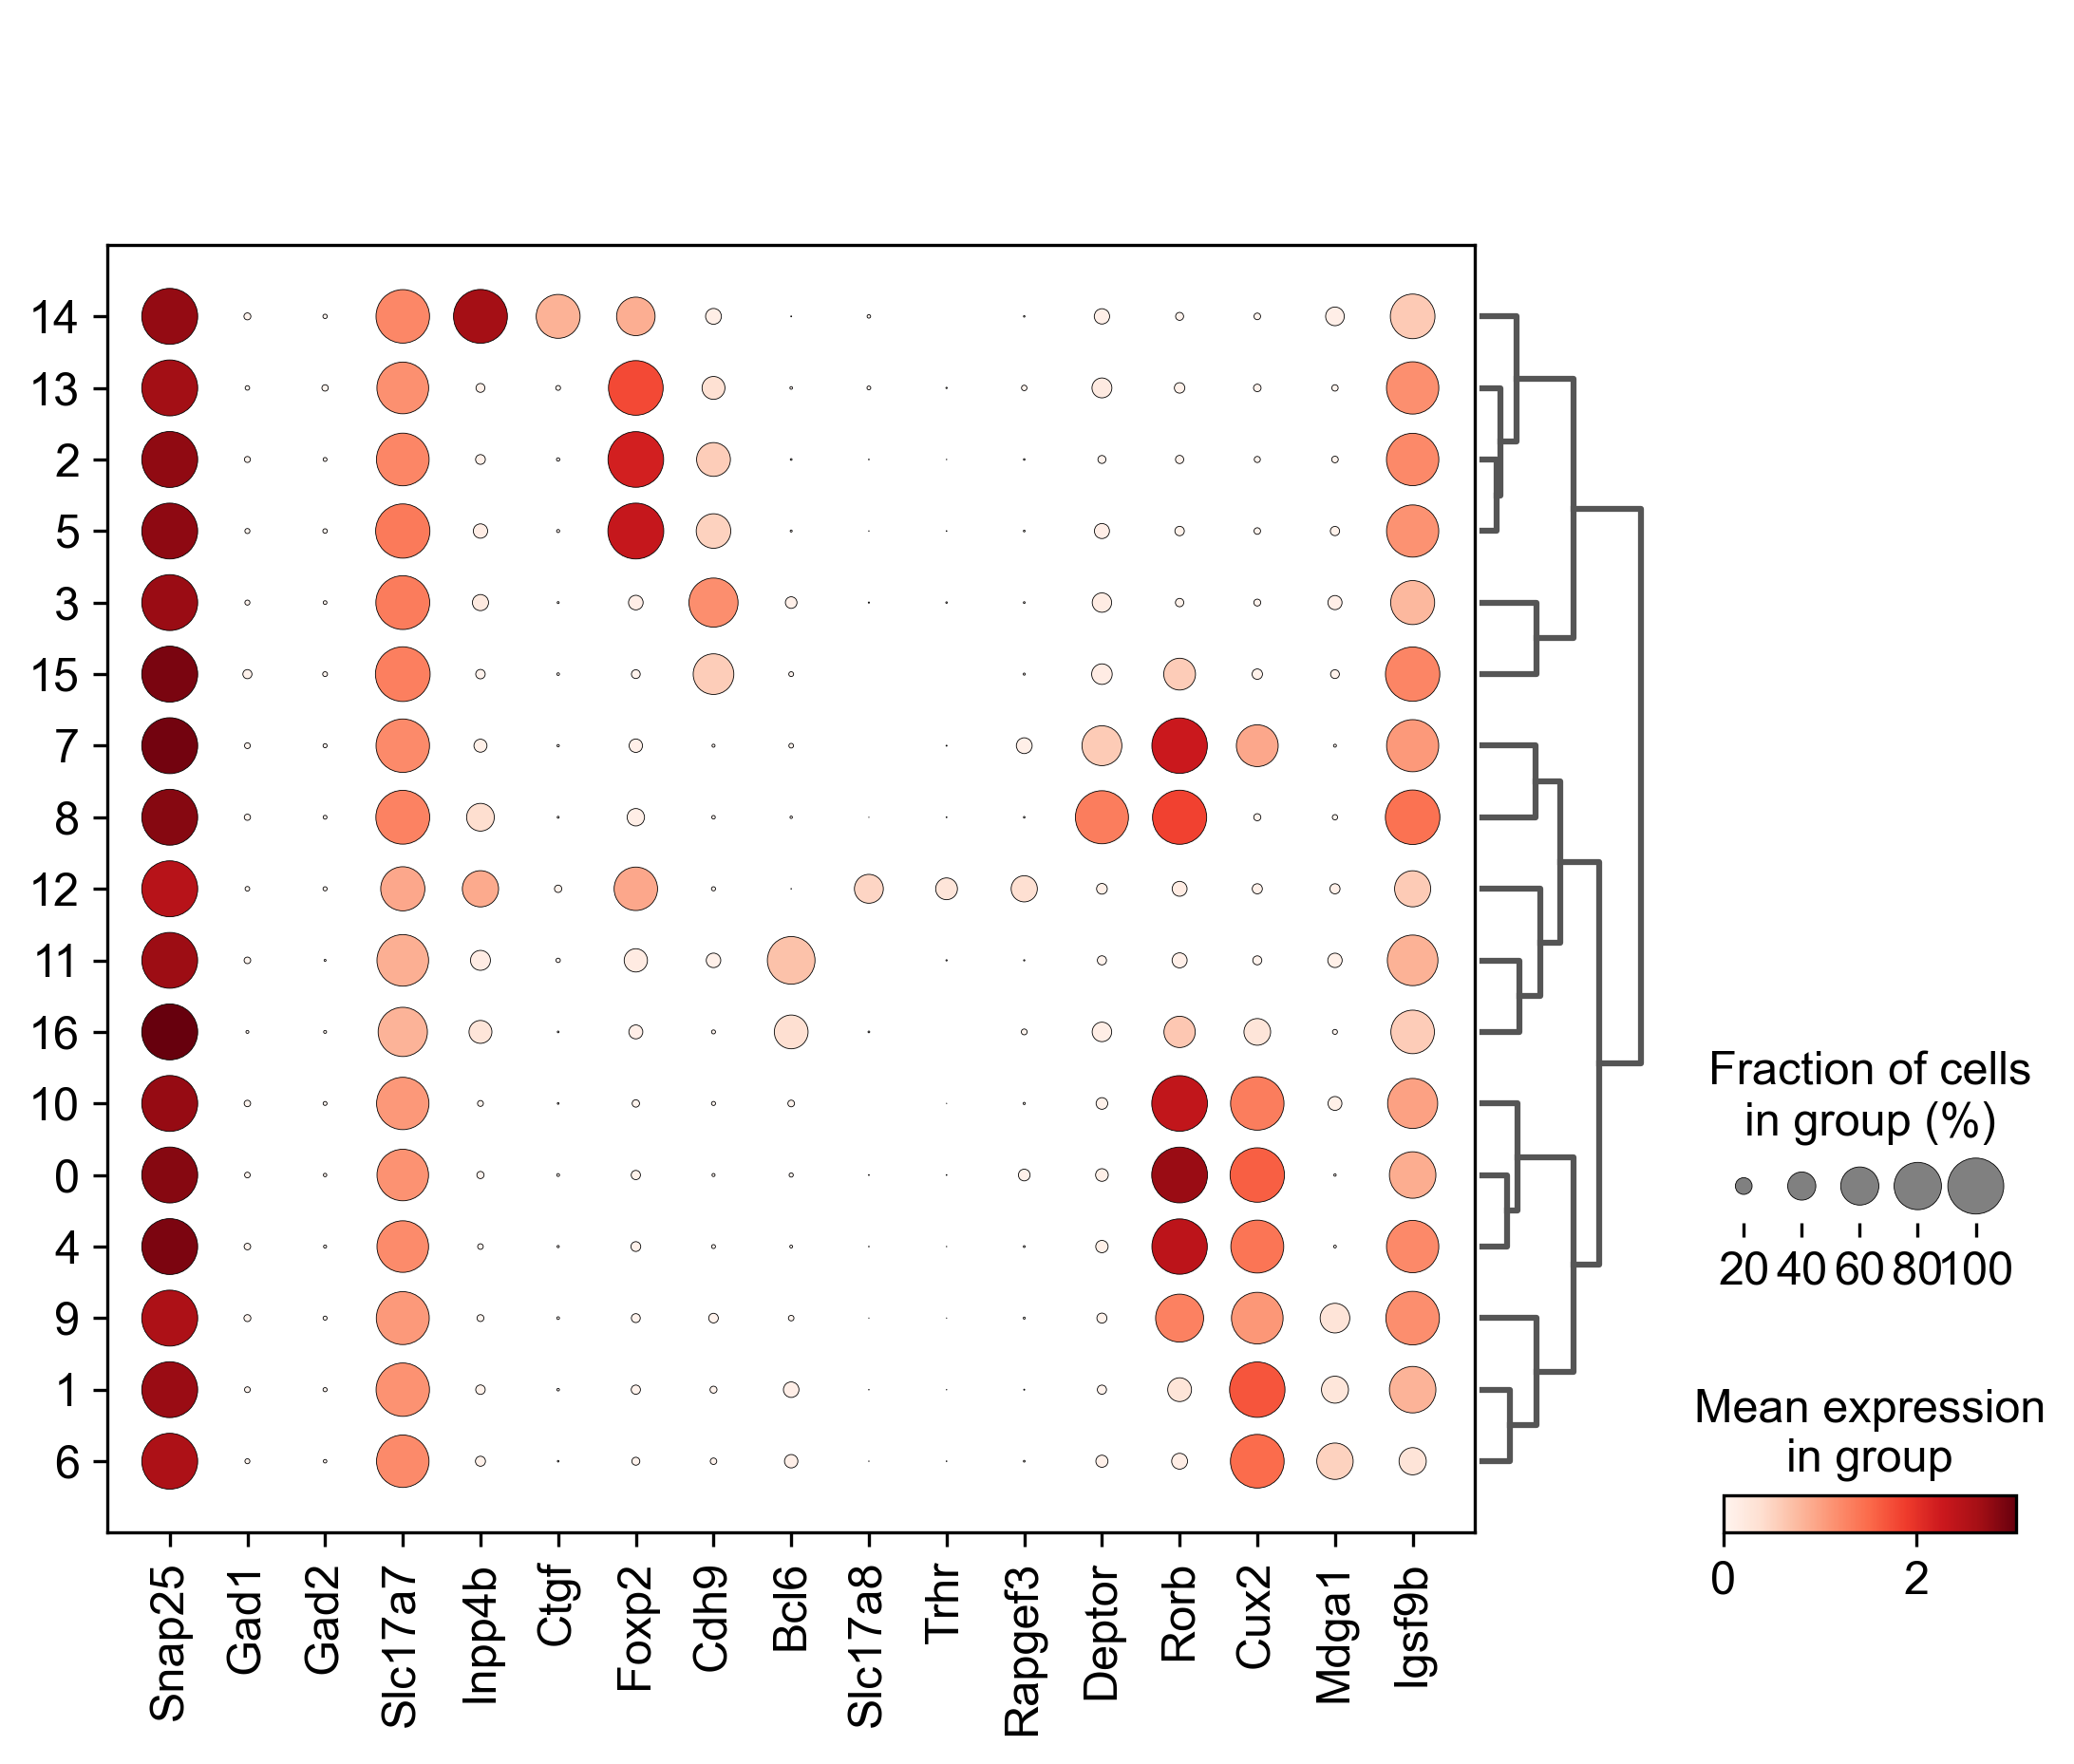

In [7]:
sc.tl.dendrogram(P28_glut, groupby='cluster', use_rep='SC')
fig, axs = plt.subplots(1, 2, figsize = (9,4), constrained_layout=True)
sc.pl.umap(P28_glut, color='cluster', ax=axs[0], 
           show=False, legend_fontsize='10', legend_loc='on data',
           title='P28: ' + str(P28_glut.shape[0]) + ' cells', 
          palette=('#17becf', '#8c564b', '#ffbb78', '#e377c2', '#ff7f0e', '#d62728', 
                  '#aec7e8', '#ff9896', '#98df8a', '#dbdb8d', '#f7b6d2', '#1f77b4', '#b5bd61', 
                  '#aa40fc', '#c5b0d5', '#c49c94'), frameon=True)
sc.pl.umap(P28_glut, color='sample', ax=axs[1], show=False, title='Batch')

bias_markers = ['Snap25', 'Gad1', 'Gad2', 'Slc17a7', 'Inpp4b', 'Ctgf',
                'Foxp2', 'Cdh9', 'Bcl6', 
                'Slc17a8', 'Trhr', 'Rapgef3', 'Deptor', 'Rorb', 'Cux2', 'Mdga1', 'Igsf9b']

#bias_pos = [(0,6), (7,15)]
#bias_labels = ['Neuronal', 'Non-Neuronal']
sc.pl.dotplot(P28_glut, bias_markers, groupby='leiden', dendrogram=True)

In [78]:
cluster_dict = {0:'L4_C', 1:'L2/3_A', 2:'L6CT_B', 3:'L6IT_A', 4:'L4_B', 5:'L6CT_C', 6:'L2/3_B',
                7:'L4_A', 8:'L5IT', 9:'L2/3_C', 10:'L4_D', 11:'L5PT_A', 12:'L5NP', 13:'L6CT_A', 
                14:'L6b', 15:'L6IT_B', 16:'L5PT_B'}
cluster = []
for i in cluster_dict: cluster.append((cluster_dict[i]))

P28_glut.obs['cluster'] = P28_glut.obs['leiden']
P28_glut.rename_categories(key='cluster', categories=cluster)

In [3]:
P28_glut = sc.read_h5ad('P28_glut08312020.h5ad')

Storing dendrogram info using `.uns["dendrogram_['cluster']"]`


/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


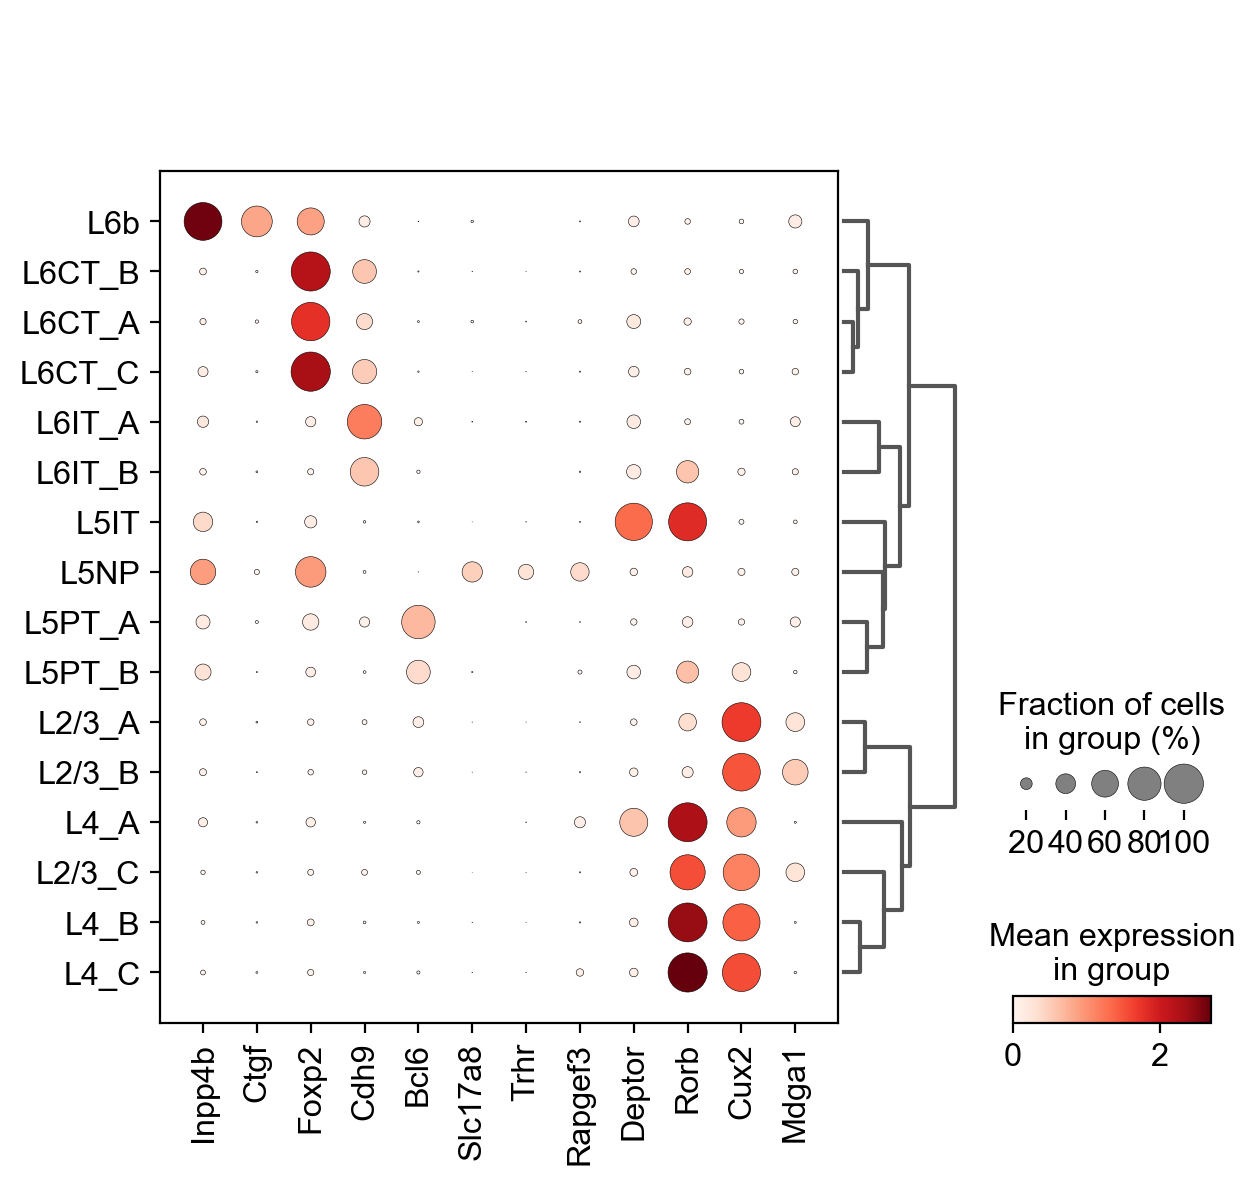

In [4]:
bias_markers = ['Inpp4b', 'Ctgf',
                'Foxp2', 'Cdh9', 'Bcl6', 
                'Slc17a8', 'Trhr', 'Rapgef3', 'Deptor', 'Rorb', 'Cux2', 'Mdga1']
sc.tl.dendrogram(P28_glut, groupby='cluster', use_rep='SC')
sc.pl.dotplot(P28_glut, bias_markers, groupby='cluster', dendrogram=True)

In [358]:
P28_glut.write_h5ad('P28_glut08102020.h5ad')

In [246]:
P28_glut.write_h5ad('P28_glut08082020.h5ad')

In [7]:
P28_glut = sc.read_h5ad('P28_glut08102020.h5ad')

# Read

In [3]:
P28_glut = sc.read_h5ad('P28_glut08312020.h5ad')

# Save

In [15]:
P28_glut.write_h5ad('P28_glut08312020.h5ad')